# Average Directional Movement Rating (ADXR)

https://www.fmlabs.com/reference/default.htm

https://www.linnsoft.com/techind/adxr-avg-directional-movement-rating

https://www.marketvolume.com/technicalanalysis/adxr.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^NSEBANK'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500


In [3]:
import talib as ta

In [4]:
df['ADX'] = ta.ADX(df['High'], df['Low'],df['Adj Close'], timeperiod=4)

In [5]:
n = 7
df['ADXR'] = (df['ADX'][n] + df['ADX'][n+7:]) / 2
df

,Open,High,Low,Close,Adj Close,Volume,ADX,ADXR
Date,,,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,NaN,NaN
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,NaN,NaN
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,NaN,NaN
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,NaN,NaN
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+05:30,41951.351562,42226.648438,41597.648438,41668.050781,41667.566406,332600,68.295111,49.794472
2022-12-27 00:00:00+05:30,42827.750000,42927.199219,42394.148438,42859.500000,42859.000000,229600,54.496966,42.895400
2022-12-28 00:00:00+05:30,42733.601562,43034.949219,42694.851562,42827.699219,42827.203125,230500,42.000781,36.647308


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


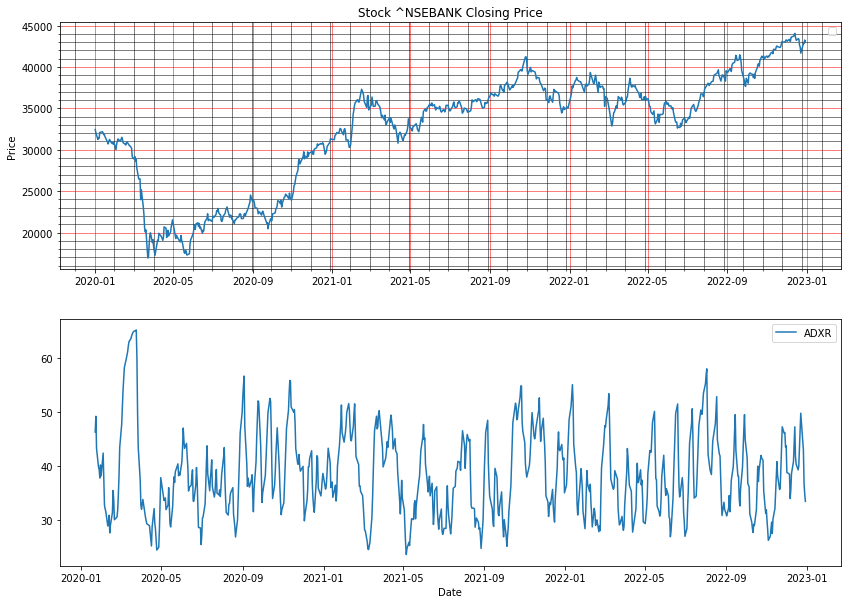

In [6]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
#ax1.grid(True, which='both')
ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ADXR'], '-', label='ADXR')
#ax2.text(s='Strong Trend', x=df['ADXR'].index[0], y=50, fontsize=14)
#ax2.text(s='Weak Trend', x=df['ADXR'].index[0], y=20, fontsize=14)
#ax2.axhline(y=50,color='r')
#ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with ADX

In [7]:
# Candlestick
dfc = df.copy()

from matplotlib import dates as mdates
import datetime as dt

dfc['ADX'] = ta.ADX(dfc['High'], dfc['Low'],dfc['Adj Close'], timeperiod=14)
dfc = dfc.dropna()
dfc.head()

,Open,High,Low,Close,Adj Close,Volume,ADX,ADXR
Date,,,,,,,,
2020-02-10 00:00:00+05:30,31248.650391,31248.800781,30957.199219,31058.150391,31057.789062,239700,35.392043,28.833608
2020-02-11 00:00:00+05:30,31230.199219,31505.949219,31225.900391,31300.599609,31300.236328,198900,33.344315,29.520275
2020-02-12 00:00:00+05:30,31441.150391,31588.599609,31398.150391,31492.900391,31492.535156,226000,31.267570,30.827819
2020-02-13 00:00:00+05:30,31586.550781,31649.449219,31180.599609,31230.250000,31229.886719,303000,29.757578,27.555331
2020-02-14 00:00:00+05:30,31281.849609,31436.650391,30776.099609,30834.800781,30834.443359,341400,29.056138,28.991241


In [8]:
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADX,ADXR,VolumePositive
0,18262.770833,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,NaN,NaN,True
1,18263.770833,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,NaN,NaN,False
2,18266.770833,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,NaN,NaN,False
3,18267.770833,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,NaN,NaN,False
4,18268.770833,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,NaN,NaN,True


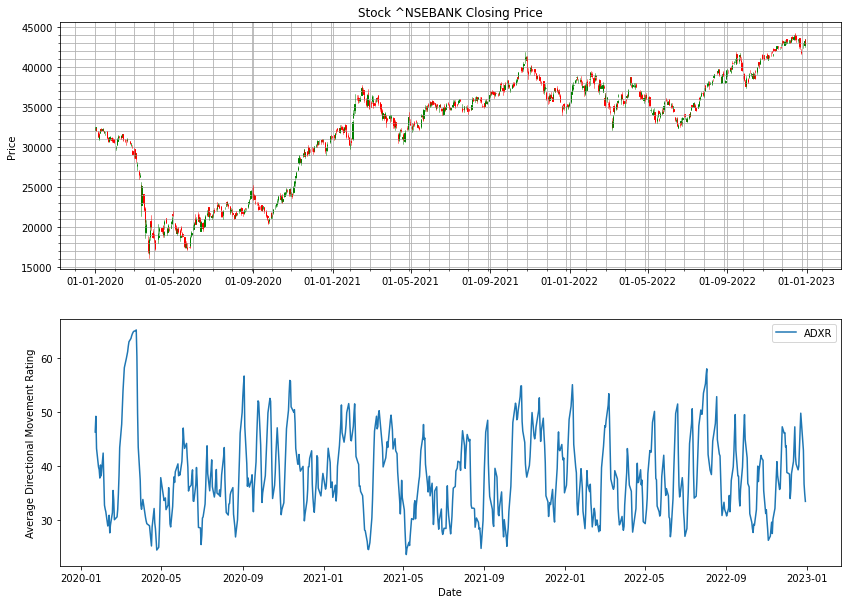

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
#ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ADXR'], '-', label='ADXR')
#ax2.text(s='Strong Trend', x=df['ADXR'].index[0], y=50, fontsize=14)
#ax2.text(s='Weak Trend', x=df['ADXR'].index[0], y=20, fontsize=14)
#ax2.axhline(y=50,color='r')
#ax2.axhline(y=20,color='r')
ax2.set_ylabel('Average Directional Movement Rating')
ax2.set_xlabel('Date')
ax2.legend(loc='best')